<a href="https://colab.research.google.com/github/shalabhs45/ML/blob/main/ClassificationAlgorithms/Classification_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## upload data to colab

In [ ]:
import pandas as pd
# Reading the csv
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# PreProcessing

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
#only numerical variable
df.describe()

In [ ]:
#all columns
df.describe(include='all')

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# Calculate the percentage of missing values in df_read
percentage_missing = df.isnull().sum() / len(df) * 100

# Create a new DataFrame with columns from df and index set to None
new_df = pd.DataFrame(columns=df.columns, index=None)
pd.set_option('display.max_columns', None)

# Creating new Percentage index
new_df.loc['Percentage'] = percentage_missing.values
new_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Keeping only those features with less than 20% of missing values
features_to_keep = df.columns[((df.isnull().sum()/len(df))*100 < 20)].to_list()
print("Total features before:",len(df.columns))
print("Total features now:",len(features_to_keep))

Total features before: 21
Total features now: 21


In [ ]:
# df1=df[features_to_keep]
# df1.shape

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

## EDA

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Text(0.5, 1.0, 'Loan status count')

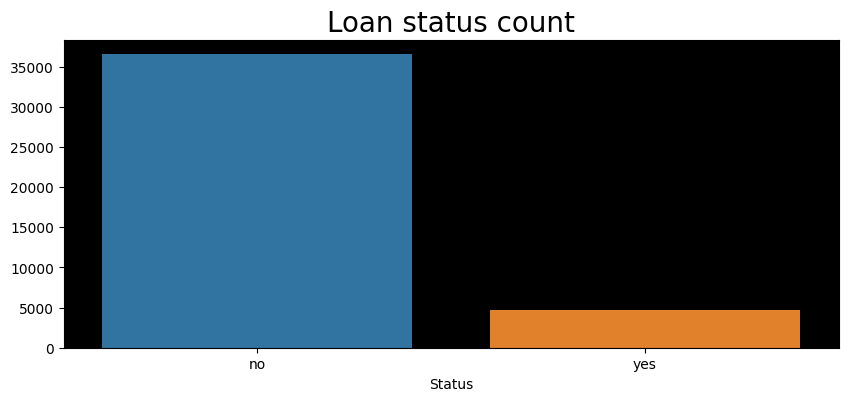

In [ ]:
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="y")
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)

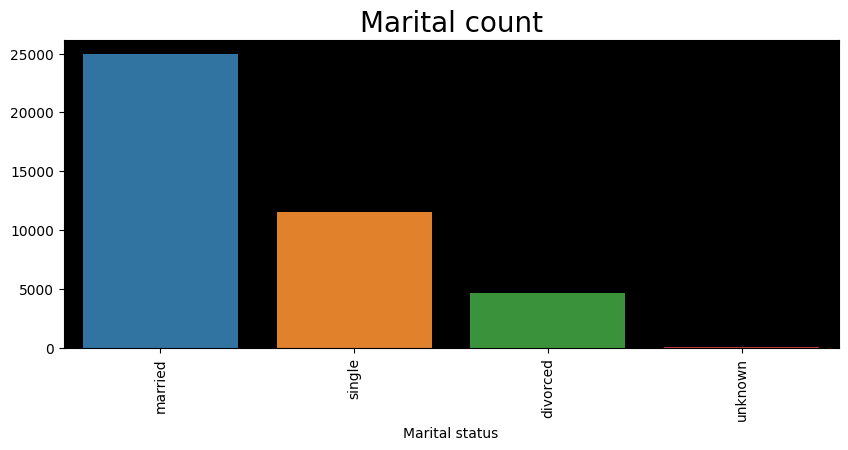

In [ ]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="marital")
ax.set(xlabel='Marital status', ylabel='')
ax.set_title('Marital count', size=20)
plt.xticks(rotation='vertical')
plt.show()

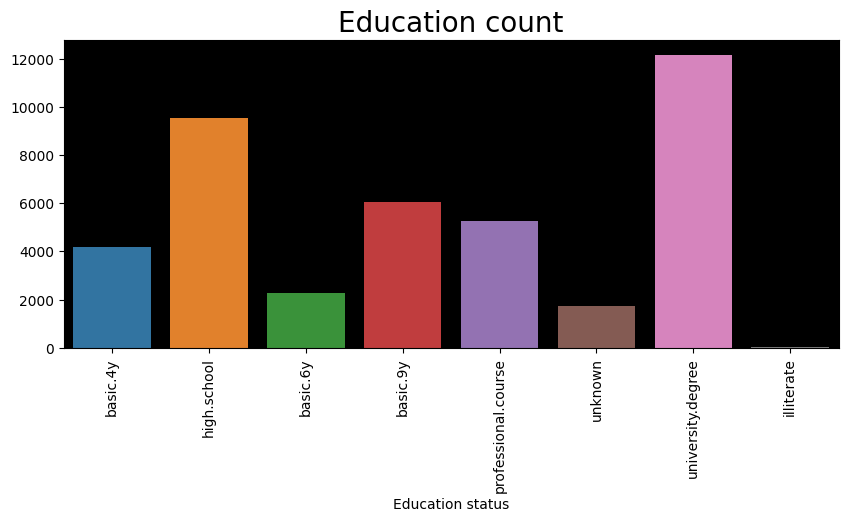

In [ ]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="education")
ax.set(xlabel='Education status', ylabel='')
ax.set_title('Education count', size=20)
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-55-a41e0b51cacd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='coolwarm')


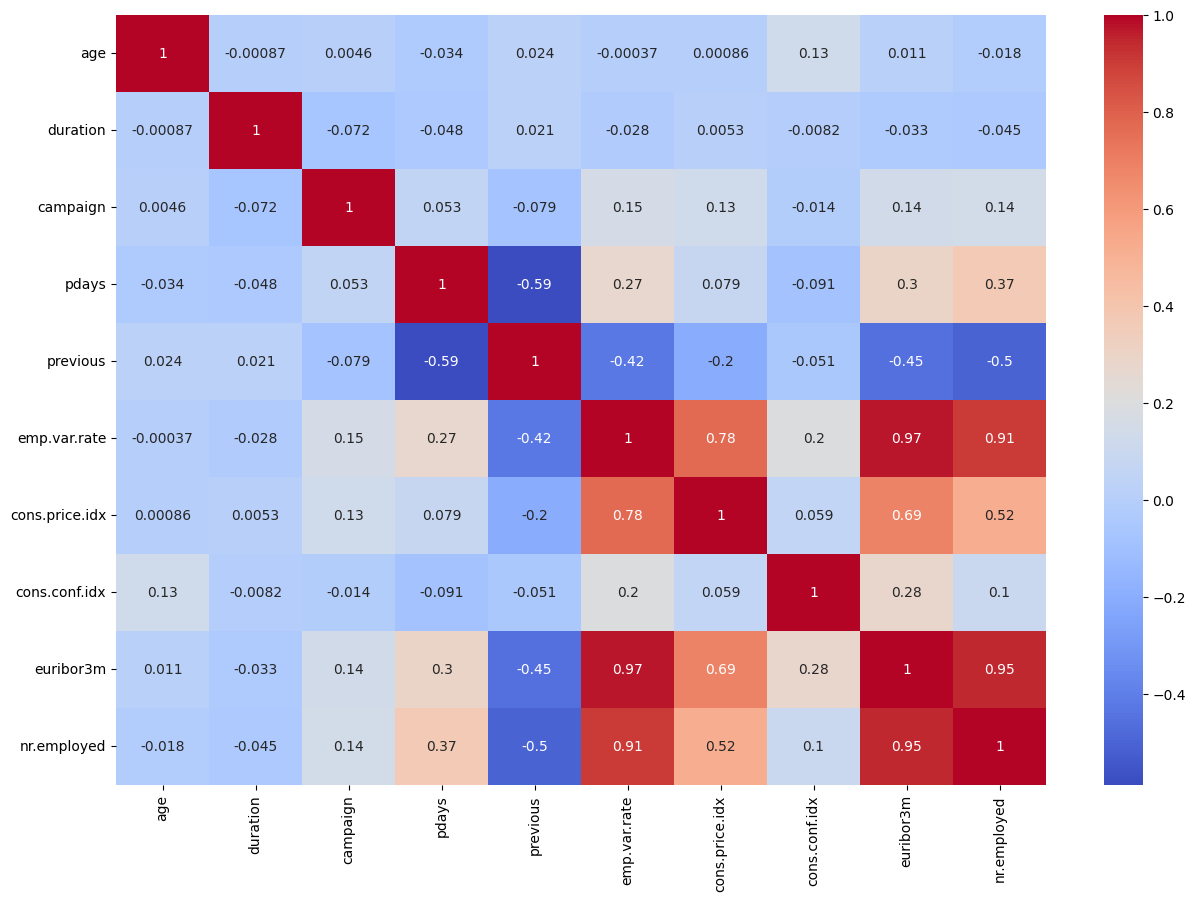

In [ ]:
# Plotting a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df['y']=df['y'].map({'yes':1,'no':0})

In [ ]:
df.nunique().sort_values(ascending=True)

y                    2
contact              2
default              3
housing              3
loan                 3
poutcome             3
marital              4
day_of_week          5
education            8
previous             8
emp.var.rate        10
month               10
nr.employed         11
job                 12
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

In [ ]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

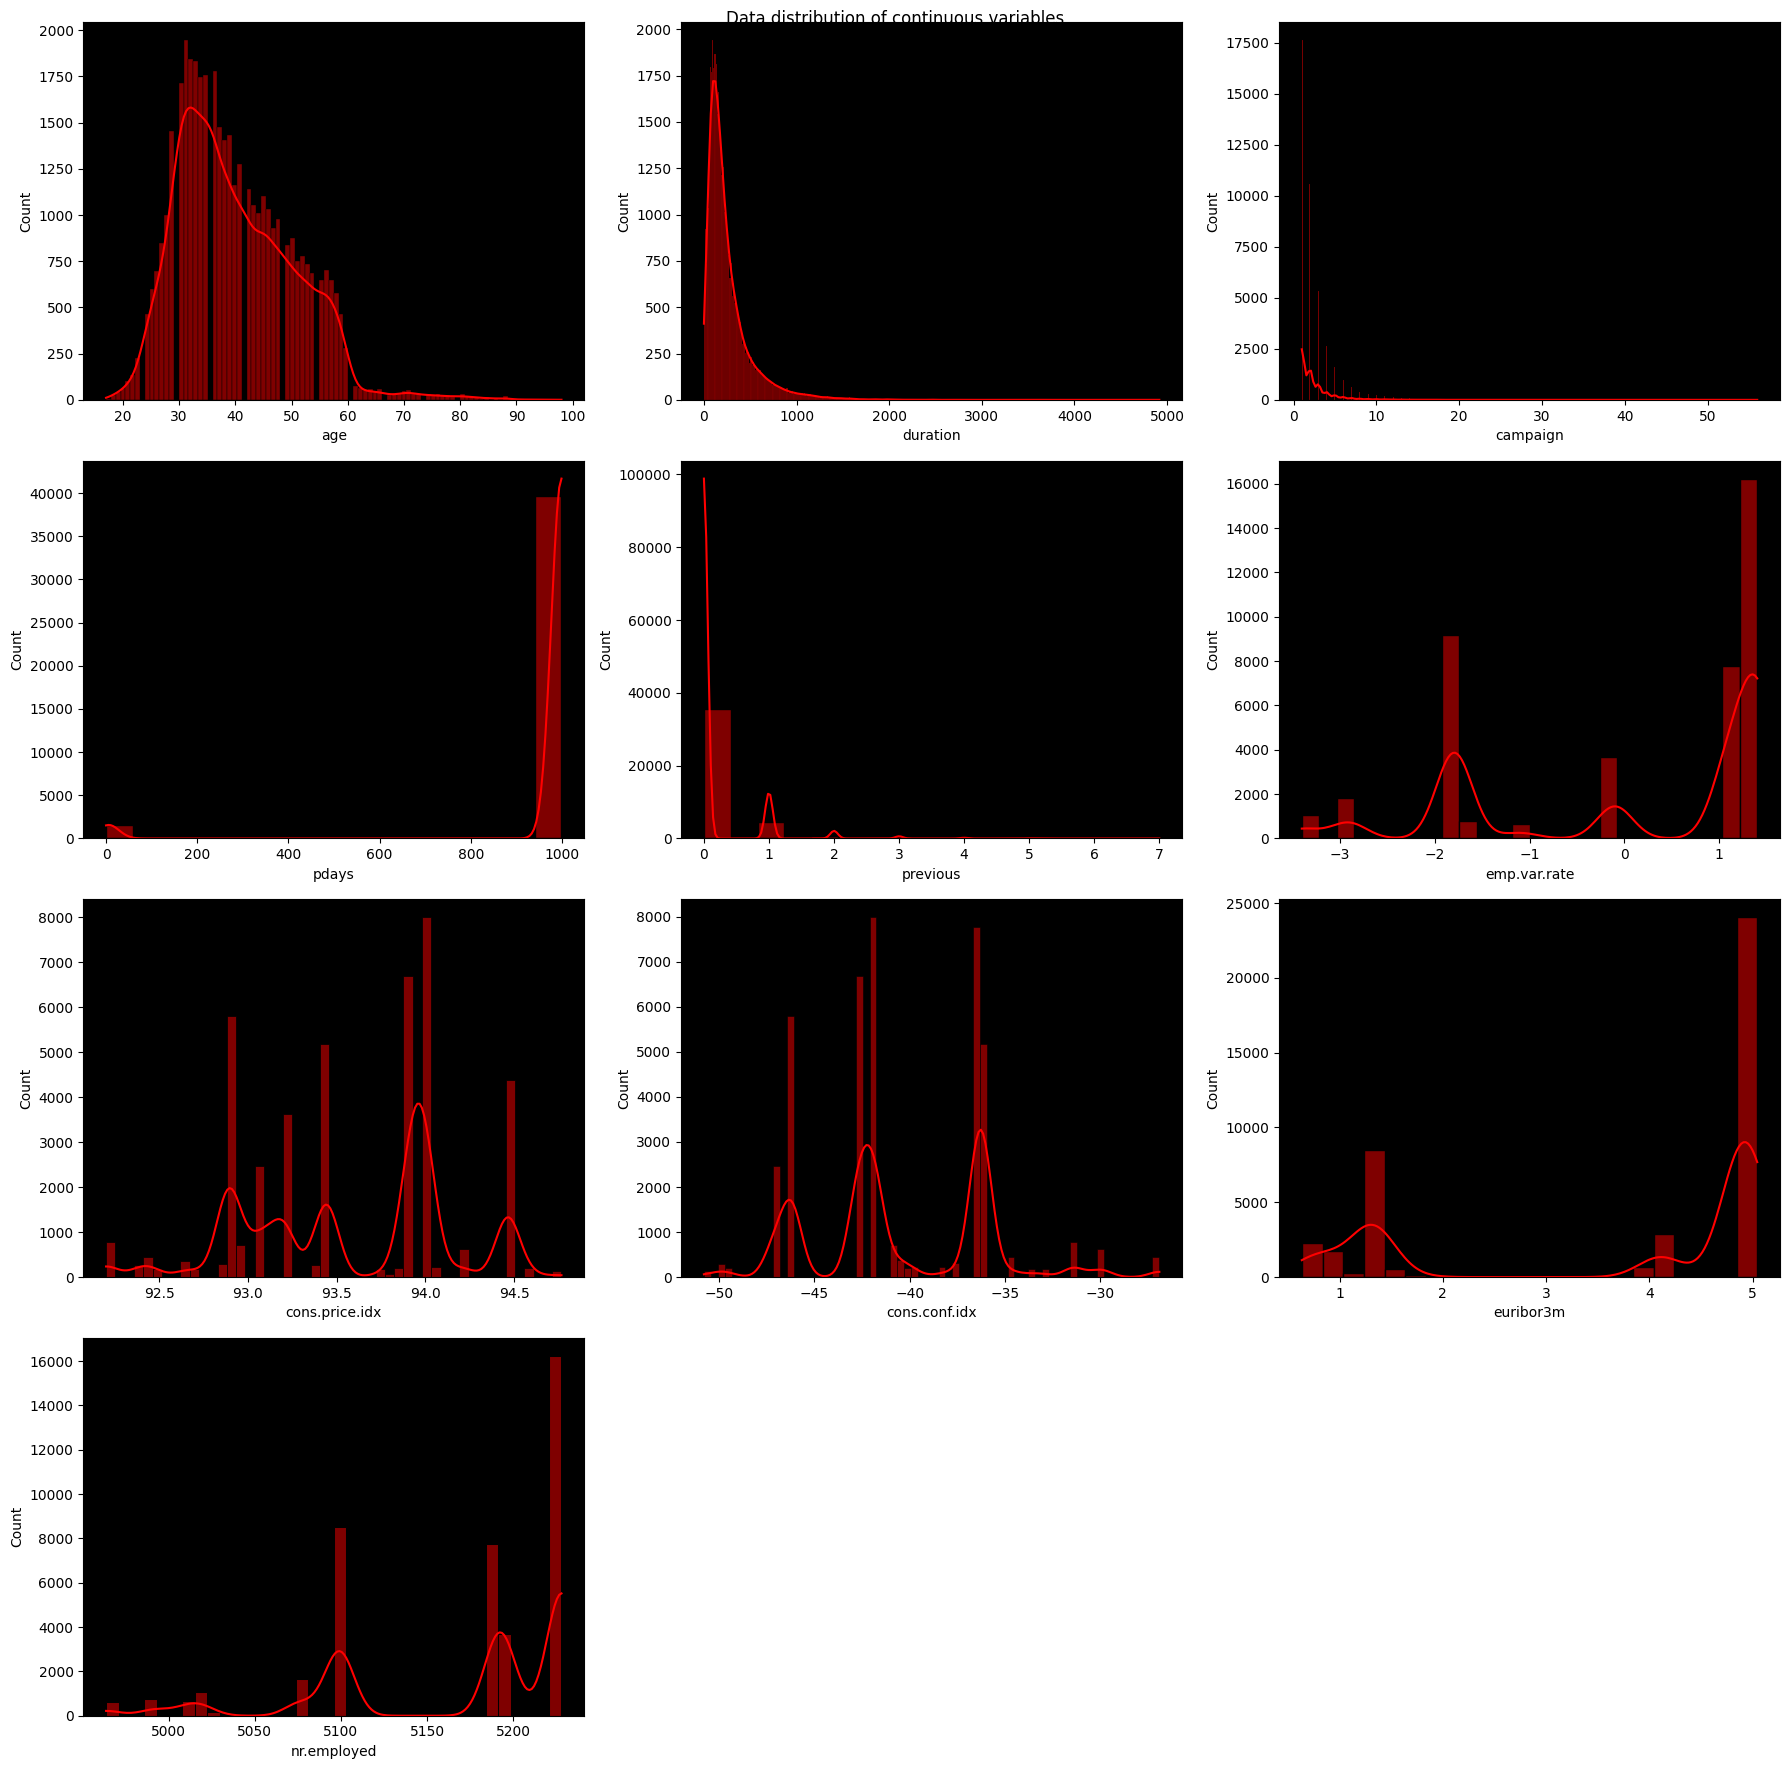

In [ ]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.drop(['y'],axis=1).select_dtypes(include=['int','float']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

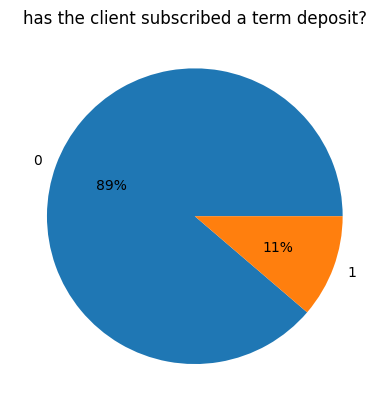

In [ ]:
#1=Yes and 0=No
target_var=pd.crosstab(index=df['y'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('has the client subscribed a term deposit?')
plt.show()

In [ ]:
df1=pd.get_dummies(df,drop_first=True)#applying One-Hot Encoding

In [ ]:
df1.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutc

In [ ]:
df1.head(4)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
X=df1.drop(['y'],axis=1)
y=df1['y']

In [ ]:
X.shape, y.shape

((41188, 53), (41188,))

In [ ]:
# X
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
# Splitting our dataset between training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=100)

## Model

**Logistic Regression**

In [ ]:
# Fit a logistic regression model to the training data
model = LogisticRegression(random_state = 42, max_iter = 1)
model.fit(X_train, y_train)

# Predict the rise and fall of crypto on the testing data
y_pred = model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8885112168592794


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Fit a logistic regression model to the training data
model2 = LogisticRegression(penalty='l2', solver = 'newton-cholesky')
model2.fit(X_train, y_train)

# Predict the rise and fall of crypto on the testing data
y_pred = model2.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9119160920656502


In [ ]:
# Fit a logistic regression model to the training data
model3 = LogisticRegression(penalty='l2', solver = 'sag', max_iter = 200)
model3.fit(X_train, y_train)

# Predict the rise and fall of crypto on the testing data
y_pred = model3.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9057006895212197


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**Polynomial Features**

In [ ]:
from sklearn.pipeline import make_pipeline
# Create a pipeline with polynomial features and logistic regression
model4 = make_pipeline(PolynomialFeatures(2, include_bias=True), LogisticRegression(penalty='l2', solver = 'saga', max_iter = 50, random_state = 42))

# Fit the model on the training data
model4.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression',
                 LogisticRegression(max_iter=50, random_state=42,
                                    solver='saga'))])

In [ ]:
y_test_pred = model4.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, y_test_pred))


Test Accuracy: 0.9062833835097601


**SVC**

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Fit SVM model
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

# Make predictions on the training and test sets
test_preds = svm.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, test_preds))

Test Accuracy: 0.8700592405555017


In [ ]:
# Fit SVM model
svm1 = SVC(kernel='poly', C=1, degree = 2, gamma = 'auto')
svm1.fit(X_train, y_train)

# Make predictions on the training and test sets
test_preds = svm1.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, test_preds))

Test Accuracy: 0.9117218607361367


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

test_preds = knn.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, test_preds))

Test Accuracy: 0.8983198989997087


In [ ]:
# Adding some extra parameter:
# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'ball_tree')
knn.fit(X_train, y_train)

test_preds = knn.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, test_preds))

Test Accuracy: 0.9047295328736525


**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Fit Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

test_preds = nb.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, test_preds))

Test Accuracy: 0.8694765465669613


**Naive Bayes classifier for multivariate Bernoulli models**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Fit Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

test_preds = bnb.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, test_preds))

Test Accuracy: 0.8425755074293484


In [ ]:
# Define the hyperparameters to tune and the range of values to try
params = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Create a Bernoulli Naive Bayes model
bnb = BernoulliNB()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(bnb, params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best Hyperparameters:', grid_search.best_params_)

# Use the best hyperparameters to fit the model on the training data
best_bnb = BernoulliNB(alpha=grid_search.best_params_['alpha'])
best_bnb.fit(X_train, y_train)

test_preds = best_bnb.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, test_preds))

Best Hyperparameters: {'alpha': 100}
Test Accuracy: 0.8574342041371273


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')